In [1]:
import pandas as pd

from IPython.display import display

import visuals as vs
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

# prediction_dt is 1 month ahead of active_as_of_dt and they should be month-ends
def get_customer_status(prediction_dt, active_as_of_dt):
    #df = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load("customer_status_history_train.csv.gz")
    df = pd.read_csv("customer_status_history_train.csv",sep='\t')
    #status = df.filter(df.snapshot_day <= prediction_dt).toPandas()
    status = df[df['snapshot_day']<=prediction_dt]
    status.snapshot_day = pd.to_datetime(status.snapshot_day, format='%Y-%m-%d')
    prior_month = status[status.snapshot_day <= active_as_of_dt].groupby('customer_id')
    # pick the last status of the month
    x = prior_month.last()

#     res = prior_month['snapshot_day'].agg({'enter': 'first', 'exit': 'last'})

#     res['time_diff'] = res['exit'] - res['enter']
    
    active_customers = x[x.ku_status == 'PAID ACTIVE'].index
    
#     print res.columns.values
    prediction_month = status[status.snapshot_day <= prediction_dt].groupby('customer_id')
    # set the last status of the month (in case the status flipped within the month)
    x = prediction_month.last()
    
#     completedf = pd.merge(x, res, left_index=True, right_index=True)

#     completedf.time_diff = completedf.time_diff.dt.days
    
#     completedf.drop(['enter','exit'], axis=1, inplace=True)
    
    prediction_month_status = x[x.index.isin(active_customers)]
    
    return prediction_month_status


In [226]:
status = get_customer_status('2017-08-31', '2017-07-31')
status.head(50)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,snapshot_day,ku_status,time_diff
customer_id,,,
00012d5c5b3caba6486bf760f154a1a1310603a87a233982f19365ed4af4b60f,2017-08-10,PAID CANCELLED,20
000151374577dd6fe194237e23627f83541bcc39926089d7f63bc041c7fafe67,2017-08-24,PAID CANCELLED,0
00015215c16e4586578b42c2ee8535cbcec8e93bf2b62c78dfcbc059573d58b1,2017-02-01,PAID ACTIVE,33
000152eaa0928969c1da93e930e2944698e21594729f6ae7182e8cda46233c46,2017-08-20,PAID CANCELLED,47
0001d4efe1974e3d822ebed0ac4bc05cf85da8a8b61d839a504b9c3d92c4f53b,2017-05-12,PAID ACTIVE,0
000288f9e640ee8037d7bfd75080ce0e74e5547e67bdb1b6faa693487ad8f3cb,2017-08-10,PAID ACTIVE,0
0003c3dcbaf3711934f17520fcecf796d2ceeaa555104eb05d2f8d695e9d4703,2017-08-25,PAID CANCELLED,315
000539da8805ed55e4a4384b413c9a86e4e24464e72d4a415ad51f38f0bcf42a,2017-02-26,PAID ACTIVE,182
0005bf7f866e805c134f4283faba510e0b9ad33ff7031350cc6a26c4124d892f,2017-08-17,PAID CANCELLED,131


In [2]:
import pandas as pd
def get_customer_activity_features(month_end_dt):
    # Read the purchase history file in
    # ph = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load("customer_purchase_history.csv.gz")
    ph = pd.read_csv("customer_purchase_history.csv",sep='\t')
    data = ph[ph['snapshot_day']==month_end_dt]
    cust_features = data[['customer_id', 'paid_units_mtd', 'ku_loans_t7', 'ku_loans_mtd', 'free_units_mtd', 'pbook_units_mtd']]
    # Cheat by filtering on the month end summary record. Pick only paid units and ku loans month-to-date
    #cust_features = ph.filter(ph.snapshot_day == month_end_dt).select(['customer_id', 'paid_units_mtd', 'ku_loans_t7', 'ku_loans_mtd', 'free_units_mtd', 'pbook_units_mtd']).toPandas()
    # Convert to integer type
    cust_features.paid_units_mtd = cust_features.paid_units_mtd.astype(int)
    cust_features.ku_loans_mtd = cust_features.ku_loans_mtd.astype(int)
    cust_features.ku_loans_t7 = cust_features.ku_loans_t7.astype(int)
    cust_features.free_units_mtd = cust_features.free_units_mtd.astype(int)
    cust_features.pbook_units_mtd = cust_features.pbook_units_mtd.astype(int)
    return cust_features
    # cust_features[(cust_features.paid_units_mtd != 0) & (cust_features.ku_loans_mtd != 0)].count()


In [5]:
def get_customer_device_features(month_end_dt):
    # Read the device history file in
    # dh = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load("customer_device_history.csv.gz")
    dh = pd.read_csv("customer_device_history.csv",sep='\t')
    data = dh[dh['snapshot_day']<= month_end_dt]
    cust_features = data[['snapshot_day', 'customer_id', 'active_android', 'active_kcp', 'active_ios', 'active_kcr', 'active_tablet', 'active_eink', 'active_phone', 'active_firetv']]
    # Convert to integer type
    #cust_features.active_android = cust_features.active_android.astype(float)
    
    #cust_features.active_android.fillna(0, inplace=True)
    #cust_features.active_android = cust_features.active_android.astype(int)
    #cust_features = cust_features.groupby('customer_id')['active_android'].last()
    
    #cust_features = pd.Series.to_frame(cust_features)
#     cust_features.head(10)
    cust_features['num_active'] = cust_features.sum(axis=1)
    
    cust_features.num_active = cust_features.num_active.astype(float)
    cust_features.num_active.fillna(0, inplace=True)
    cust_features.num_active = cust_features.num_active.astype(int)
    cust_features = cust_features.groupby('customer_id')['num_active'].last()
    return cust_features
    # cust_features[(cust_features.paid_units_mtd != 0) & (cust_features.ku_loans_mtd != 0)].count()

# device_counts = get_customer_device_features('2017-08-31')
# device_counts.head()

In [77]:
device_counts = get_customer_device_features('2017-07-31')
device_counts.head(30)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


customer_id
00006cbd025f7b0b3f894b319efccde84f1b059bf7b76f0a44de15e6fd19e82e    2
0000dfb1ac7e6ffb2e8f0f4e14271afa87cf0c5cddc030916709d13ef1763d76    2
0000e2aee8f9a5f294b1d8f765c8848e00eb051cc4faaa3ab4eb75c879dbcb7b    3
0000f6dbd168a7b51a238b6a2ffbc66f7c097bda5326d48ac076e207a89b5ff1    1
000112ee1dbd72cede2d7e0b62eb010ba97bb6ec12eac83328b545f11c434f2b    2
00012d5c5b3caba6486bf760f154a1a1310603a87a233982f19365ed4af4b60f    4
000151374577dd6fe194237e23627f83541bcc39926089d7f63bc041c7fafe67    2
00015215c16e4586578b42c2ee8535cbcec8e93bf2b62c78dfcbc059573d58b1    4
000152eaa0928969c1da93e930e2944698e21594729f6ae7182e8cda46233c46    1
0001b4a4c789ea629a0d2bbf2aa3ae25404dc03ad836d97efb7b83e8b178f46a    2
0001d4efe1974e3d822ebed0ac4bc05cf85da8a8b61d839a504b9c3d92c4f53b    1
00020dd3dabe9720e3616b71ee99cc023c2ebc2a0562f1d760f2188389cedb8a    5
000288f9e640ee8037d7bfd75080ce0e74e5547e67bdb1b6faa693487ad8f3cb    6
00029a793878547625ba1eb5c33cfa9700a4622ec8677fa8a8fa9c5b4875e1c5    1
0002bb9c

In [0]:
# Code to save intermediate data frames to CSV
from io import BytesIO
import boto3
from boto3.session import Session

# To be used in eider workspace only (references variables provided by eider)
def write_to_s3(df, bucket, key):
    session = Session(aws_access_key_id=awsAccessKeyId, aws_secret_access_key=awsSecretKey)
    s3_resource = session.resource("s3")
    csv_buffer = BytesIO()
    df.to_csv(csv_buffer)
    # s3_resource.Object('emr-eldorado', 'cust_features.csv').put(Body=csv_buffer.getvalue())
    s3_resource.Object(bucket, username + "/" + key).put(Body=csv_buffer.getvalue())

In [6]:
x = get_customer_activity_features('2017-07-31')
x.index = x.customer_id
x = x.drop('customer_id', axis=1)

status = get_customer_status('2017-08-31', '2017-07-31')
status.head(5)
x =  x[x.index.isin(status.index)]
x['status'] = status[status.index.isin(x.index)]['ku_status']
# x['num_days'] = status[status.index.isin(x.index)]['time_diff']
# df1 = status[['time_diff']]
# x = pd.merge(x,df1 , left_index=True, right_index=True)
device_counts = get_customer_device_features('2017-07-31')
#x['active_android'] = device_counts[device_counts.index.isin(x.index)]
x['num_active'] = device_counts[device_counts.index.isin(x.index)]

x.head(50)
# write_to_s3(x, 'ml-hack-subs-data', 'prepared-dataset-2017-08-31.csv')

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,paid_units_mtd,ku_loans_t7,ku_loans_mtd,free_units_mtd,pbook_units_mtd,status,num_active
customer_id,,,,,,,
18272f7fb12370c0a3f3f7b199d5d691be231ac491257c4c342611fe5998643b,19,2,25,13,14,PAID ACTIVE,3
826a38e1a5bcf566411f775491ec3aa0ecd6d7d5f2e8c5cf781c0a1836da5320,0,0,2,2,2,PAID ACTIVE,6
0c0d145bbab185dc3b9940c54e9d26be7da9df116a6b0ff0f4df0a02eba3e20b,0,0,1,0,0,PAID ACTIVE,2
01278220976bcc9a1efb7bf086e40013b89101f37b1df7060c0867fc33adb4ce,2,0,0,0,1,PAID ACTIVE,9
4ed3507f64b47b9fe6bdc0681367c9085f8d3814dab726373a9542487edda598,0,0,0,0,0,PAID ACTIVE,3
e15233d1e8eb61469b49e0f111aab0614d380ffd9191f04898c04fe391136a1a,4,3,8,0,0,PAID ACTIVE,8
401aa7fc25570c20a4831a504d035b9906d258255354c5a5d4d4c68363d2ece6,2,0,0,0,1,PAID ACTIVE,18
04e90acb575a4faa64d5c131be9bb16a15ef3e207f530dfd465943e7be62cb84,0,0,0,0,0,PAID CANCELLED,5
2566407730dd8269be1d5fbeea4aa63f9d5bc787f6c4c09ed387525cc71c8459,0,0,2,0,0,PAID ACTIVE,2


(60000, 70000)

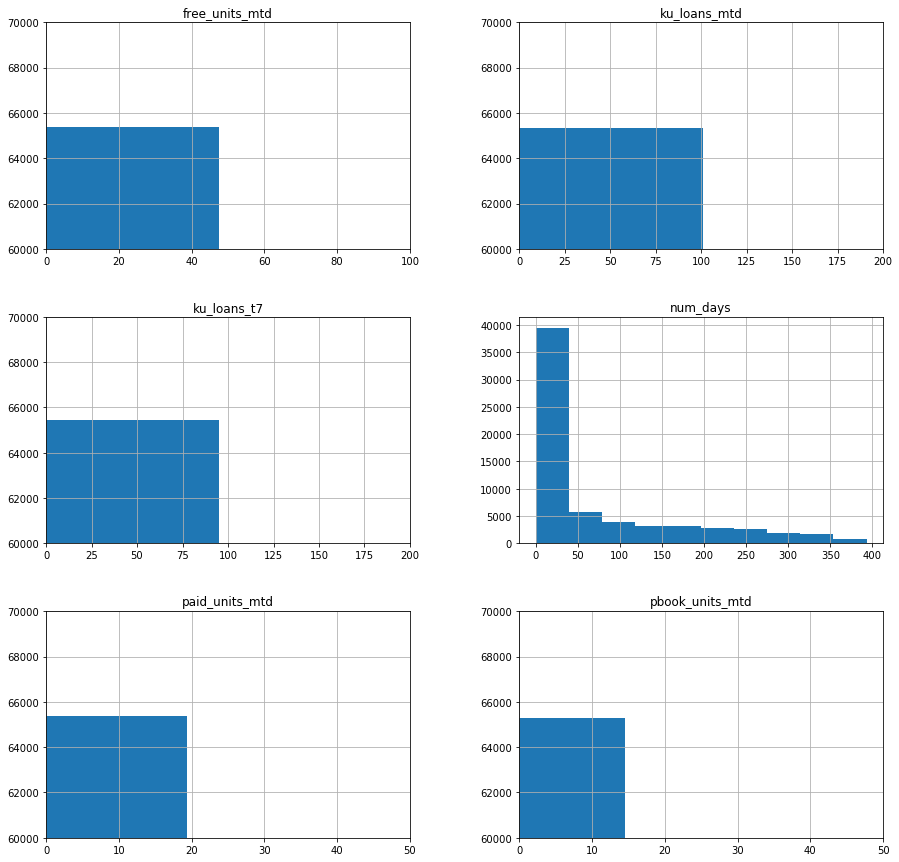

In [228]:
ax_list=pd.DataFrame.hist(x,['paid_units_mtd','ku_loans_t7','ku_loans_mtd','free_units_mtd','pbook_units_mtd','num_days'],figsize =(15,15))
ax_list[0][0].set_xlim((0,100))
ax_list[0][0].set_ylim((60000,70000))
ax_list[0][1].set_xlim((0,200))
ax_list[0][1].set_ylim((60000,70000))
ax_list[1][0].set_xlim((0,200))
ax_list[1][0].set_ylim((60000,70000))
# ax_list[1][1].set_xlim((0,20))
ax_list[2][0].set_xlim((0,50))
ax_list[2][0].set_ylim((60000,70000))
ax_list[2][1].set_xlim((0,50))
ax_list[2][1].set_ylim((60000,70000))

# I don't see anything skewed

In [232]:
# Normalize

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['paid_units_mtd','ku_loans_t7','ku_loans_mtd','free_units_mtd','pbook_units_mtd','num_active','num_days']

features_log_minmax_transform = pd.DataFrame(data = x)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])

# Show an example of a record with scaling applied
features_log_minmax_transform.head(n = 5)

,paid_units_mtd,ku_loans_t7,ku_loans_mtd,free_units_mtd,pbook_units_mtd,status,num_days,num_active
customer_id,,,,,,,,
18272f7fb12370c0a3f3f7b199d5d691be231ac491257c4c342611fe5998643b,0.097938,0.00211,0.024802,0.027426,0.095890,PAID ACTIVE,0.000000,0.049180
826a38e1a5bcf566411f775491ec3aa0ecd6d7d5f2e8c5cf781c0a1836da5320,0.000000,0.00000,0.001984,0.004219,0.013699,PAID ACTIVE,0.445293,0.098361
0c0d145bbab185dc3b9940c54e9d26be7da9df116a6b0ff0f4df0a02eba3e20b,0.000000,0.00000,0.000992,0.000000,0.000000,PAID ACTIVE,0.386768,0.032787
01278220976bcc9a1efb7bf086e40013b89101f37b1df7060c0867fc33adb4ce,0.010309,0.00000,0.000000,0.000000,0.006849,PAID ACTIVE,0.631043,0.147541
4ed3507f64b47b9fe6bdc0681367c9085f8d3814dab726373a9542487edda598,0.000000,0.00000,0.000000,0.000000,0.000000,PAID ACTIVE,0.000000,0.049180


In [233]:
features_after_removing_outliers = features_log_minmax_transform.copy()
for feature in features_log_minmax_transform.keys():
    
    if feature == 'status':
        continue
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(features_log_minmax_transform[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(features_log_minmax_transform[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*2
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    features_after_removing_outliers.drop(features_log_minmax_transform[~((features_log_minmax_transform[feature] >= Q1 - step) & (features_log_minmax_transform[feature] <= Q3 + step))].index)
    
# OPTIONAL: Select the indices for data points you wish to remove
# outliers  = [75,154,66]

# # Remove the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

df = x[(x.status == 'PAID ACTIVE') | (x.status == 'PAID CANCELLED')]
df.head(5)
# target, features = dmatrices('status ~ paid_units_mtd + ku_loans_mtd + free_units_mtd + pbook_units_mtd + num_active',
#                   df, return_type="dataframe")
target, features = dmatrices('status ~ ku_loans_mtd + ku_loans_t7',
                  df, return_type="dataframe")
print features.columns
features.head(5)
print target.head()

#Set 1 to indicte customer churn, 0 otherwise
target['status'] = target['status[PAID CANCELLED]']
target = target['status']
# make it a 1d array
target = np.ravel(target)
print target.size

#Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=0)

# instantiate a logistic regression model, and fit with features and target
# model = LogisticRegression()

C:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Index([u'Intercept', u'ku_loans_mtd', u'ku_loans_t7'], dtype='object')
                                                                  status[PAID ACTIVE]  \
customer_id                                                                             
18272f7fb12370c0a3f3f7b199d5d691be231ac491257c4c342611fe5998643b  1.0                   
826a38e1a5bcf566411f775491ec3aa0ecd6d7d5f2e8c5cf781c0a1836da5320  1.0                   
0c0d145bbab185dc3b9940c54e9d26be7da9df116a6b0ff0f4df0a02eba3e20b  1.0                   
01278220976bcc9a1efb7bf086e40013b89101f37b1df7060c0867fc33adb4ce  1.0                   
4ed3507f64b47b9fe6bdc0681367c9085f8d3814dab726373a9542487edda598  1.0                   

                                                                  status[PAID CANCELLED]  
customer_id                                                                               
18272f7fb12370c0a3f3f7b199d5d691be231ac491257c4c342611fe5998643b  0.0                     
826a38e1a5bcf566411f775491ec3aa0

In [ ]:
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import fbeta_score, make_scorer

from sklearn import svm

# # TODO: Initialize the classifier
# clf = DecisionTreeClassifier(random_state=0)

# # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'criterion': ["gini", "entropy"], 'max_features': ["auto", "sqrt","log2",None]}

C = [1]
gamma = [1]
parameters = {'C':C,'gamma':gamma}
clf = svm.SVC(kernel='rbf')
# clf = GridSearchCV(svr, parameters,cv=5)

# TODO: Make an fbeta_score scoring object using make_scorer()
# scorer = make_scorer(fbeta_score, beta=0.5)
def custom_auc(ground_truth, predictions):
     # I need only one column of predictions["0" and "1"]. You can get an error here
     # while trying to return both columns at once
     fpr, tpr, _ = metrics.roc_curve(ground_truth, predictions[:, 1], pos_label=1)    
     return metrics.auc(fpr, tpr)

# to be standart sklearn's scorer        
# scorer = make_scorer(custom_auc, greater_is_better=True, needs_proba=False)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,
                    cv=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(features_train,target_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

print grid_fit.best_params_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(features_train, target_train)).predict(features_test)
predicted = best_clf.predict(features_test)


# model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
#                         algorithm="SAMME",
#                         n_estimators=20)
# model = model.fit(features_train, target_train)

# # predict the outcome for the test features
# predicted = model.predict(features_test)
print predicted

In [8]:
# instantiate a logistic regression model, and fit with features and target
model = LogisticRegression()
model = model.fit(features_train, target_train)

# predict the outcome for the test features
predicted = model.predict(features_test)
print predicted

# Check to see if it identifies anyone as churning
predicted.size
np.sum(predicted)

probs = model.predict_proba(features_test)
print probs

print metrics.accuracy_score(target_test, predicted)
# The metric we use in leaderboard
print metrics.roc_auc_score(target_test, probs[:, 1])

print metrics.confusion_matrix(target_test, predicted)
print metrics.classification_report(target_test, predicted)

[ 0.  0.  0. ...,  0.  0.  0.]
[[ 0.8068153   0.1931847 ]
 [ 0.82438859  0.17561141]
 [ 0.88555324  0.11444676]
 ..., 
 [ 0.82438859  0.17561141]
 [ 0.80061277  0.19938723]
 [ 0.84533297  0.15466703]]
0.809237663594
0.61147398464
[[15873    33]
 [ 3713    18]]
             precision    recall  f1-score   support

        0.0       0.81      1.00      0.89     15906
        1.0       0.35      0.00      0.01      3731

avg / total       0.72      0.81      0.73     19637



In [272]:
# Check to see if it identifies anyone as churning
predicted.size
np.sum(predicted)

probs = model.predict_proba(features_test)
print probs

print metrics.accuracy_score(target_test, predicted)
# The metric we use in leaderboard
print metrics.roc_auc_score(target_test, probs[:, 1])

print metrics.confusion_matrix(target_test, predicted)
print metrics.classification_report(target_test, predicted)

[[ 0.58715561  0.41284439]
 [ 0.58881206  0.41118794]
 [ 0.59322818  0.40677182]
 ..., 
 [ 0.58801412  0.41198588]
 [ 0.56800736  0.43199264]
 [ 0.59545367  0.40454633]]
0.75810969089
0.620922005498
[[14362  1544]
 [ 3206   525]]
             precision    recall  f1-score   support

        0.0       0.82      0.90      0.86     15906
        1.0       0.25      0.14      0.18      3731

avg / total       0.71      0.76      0.73     19637



In [12]:
testdf = pd.read_csv('public_test_set.csv')
print testdf.shape
testdf.rename(columns={'Id': 'customer_id'}, inplace=True)
testdf.index = testdf.customer_id
testdf = testdf.drop('customer_id', axis=1)

testfeatures = get_customer_activity_features('2017-08-31')
testfeatures.index = testfeatures.customer_id
testfeatures = testfeatures.drop('customer_id', axis=1)
print "activity features"
print testfeatures.shape

device_counts = get_customer_device_features('2017-08-31')
#x['active_android'] = device_counts[device_counts.index.isin(x.index)]
testfeatures['num_active'] = device_counts[device_counts.index.isin(testfeatures.index)]
print testfeatures.shape
testfeatures.head(5)
# write_to_s3(x, 'ml-hack-subs-data', 'prepared-dataset-2017-08-31.csv')

testfeaturesfinal = pd.merge(testfeatures, testdf, left_index=True, right_index=True, how="right")
testfeaturesfinal.fillna(0, inplace=True)
testfeaturesfinal.head(5)
print testfeaturesfinal.shape
# target, features = dmatrices('status ~ paid_units_mtd + ku_loans_mtd + free_units_mtd + pbook_units_mtd + num_active',
#                   df, return_type="dataframe")
testfinalfeatures = testfeaturesfinal[['ku_loans_mtd', 'ku_loans_t7']]
# target, testfinalfeatures = dmatrices('status ~ ku_loans_mtd + ku_loans_t7 + time_diff + num_active + paid_units_mtd + free_units_mtd + ku_loans_mtd_june + ku_loans_t7_june + free_units_mtd_june + ku_loans_mtd_may + ku_loans_t7_may + free_units_mtd_may',
#                   df, return_type="dataframe")
testfinalfeatures.fillna(0, inplace=True)

Intercept = [1.0]*67588
se = pd.Series(Intercept)
testfinalfeatures['Intercept'] = se.values

print testfinalfeatures.shape
predicted = model.predict(testfinalfeatures)
print predicted.shape

se = pd.Series(predicted)
print testfinalfeatures.shape
testfinalfeatures['ku_status'] = se.values
print testfinalfeatures.shape
outputpd = testfinalfeatures[['ku_status']]
outputpd.ku_status = outputpd.ku_status.astype(int)
outputpd.head(10)
outputpd.index.names = ['ID']
outputpd.to_csv(r'C:\Users\choppak\Desktop\Lstudy\MLND\KU prediction\output_1.csv', sep=',', mode='a')
outputpd.shape


(67588, 1)
activity features
(141911, 5)


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(141911, 6)
(67588, 6)
(67588, 3)
(67588L,)
(67588, 3)


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(67588, 4)


(67588, 1)

In [21]:
corr = pd.DataFrame()
corr['prob'] = probs[:,1]
corr['status'] = target_test
corr.sort_values(by='status').tail()
plt.scatter(corr['prob'], corr['status'])

In [0]:
device_counts['18272f7fb12370c0a3f3f7b199d5d691be231ac491257c4c342611fe5998643b']